### Exploratory Data Analysis: COVID-19 Test Results  
_A project by Hetal Patel Dholu_

***
### Objective
***
* Understand the relationship between symptoms and test results, and identify which symptoms (e.g., cough, fever, sore throat) are commonly associated with positive COVID-19 cases.
* Analyze the influence of demographic variables, such as age (60+), gender, and known contact with infected individuals, on COVID-19 test outcomes.
* Explore the temporal distribution of tests and results to identify any time-based trends or outbreaks.
* Detect inconsistencies, missing values, or anomalies in the dataset that may affect analysis or decision-making.
* Support early identification strategies by highlighting key features that could aid in prioritizing testing and resource allocation.
This analysis aims to provide data-driven insights that could assist public health professionals, data scientists, or policymakers in understanding and managing the spread of COVID-19 more effectively.

## Data Source

The dataset used in this project was obtained from [Kaggle](https://www.kaggle.com/).  
It contains information on COVID-19 test results, demographic variables (age, gender), reported symptoms  
(cough, fever, sore throat, shortness of breath, headache), and known contact history.  

While not an official government dataset, it is a publicly available open dataset that has been widely  
used for exploratory data analysis and modeling purposes.



***
### Features in the Dataset
***
| Feature Name            | Description |
|-------------------------|-------------|
| **Ind_ID**              | Unique identifier for each individual tested. |
| **Test_date**           | Date on which the COVID-19 test was conducted. |
| **Cough_symptoms**      | Indicates whether the individual reported a cough. |
| **Fever**               | Indicates whether the individual had a fever . |
| **Sore_throat**         | Presence of sore throat symptoms. |
| **Shortness_of_breath**| Whether the person experienced breathing difficulty. |
| **Headache**            | Indicates presence of headache symptoms. |
| **Corona**              | COVID-19 test result: . |
| **Age_60_above**        | Whether the individual is aged 60 or above . |
| **Gender**              | Gender of the individual . |
| **Known_contact**       | Whether the individual had contact with a confirmed COVID-19 case). |

In [49]:
# Importing Necessary Libraries

# Data handling and analysis
import pandas as pd
import numpy as np

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Visualizing missing values
import missingno as no

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline  
# Ensures plots display within the notebook

# Data preprocessing (encoding categorical variables)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [50]:
warnings.filterwarnings('ignore')#ignores basic warnings

In [51]:
#Uploading Dataset
covid = pd.read_csv("covid_tests.csv")

In [52]:
covid_data = covid.copy(deep = True) #copying the dataset

In [53]:
covid_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Gender,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [54]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Gender               259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [55]:
covid_data.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Gender                  19563
Known_contact               0
dtype: int64

### Initial Observations from the Dataset
1. Dataset Size:The dataset contains 278,848 rows and 11 columns. 
2. Data Types:Only one column Ind_IDis of numeric type (likely a unique identifier).  
    All other columns are of object type
   The Test_date column is currently of type object and should be converted to datetime format for analysis.
3. Target Variable  
   - `Corona` is the target variable indicating COVID-19 test result (positive or negative).  
4. Missing Values  
   Some features contain missing data:Cough_symptoms, Fever: ~250 missing entries each   
        Age_60_above: over 127,000 missing values (significant)  
        Gender: ~19,500 missing values  
5. Symptom Features  
    Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, and Headache represent common COVID-19 symptoms.  
    These are expected to have predictive value for test results.  
6. Demographic Features  
    Age_60_above: Indicates if the individual belongs to a high-risk age group (Yes/No).  
    Gender: Includes missing entries — needs attention to avoid bias.
7. Contact History  
    Known_contact: Describes whether the individual had known exposure or traveled abroad.  
    Likely to be a strong indicator of COVID-19 infection risk.

In [56]:
#correcting datatype of the field Test_date
covid_data['Test_date']=pd.to_datetime(covid_data['Test_date'],format="%d-%m-%Y")

In [57]:
covid_data.describe(include='object')

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Gender,Known_contact
count,278596,278596,278847,278847,278847,278848,151528,259285,278848
unique,2,2,2,2,2,3,2,2,3
top,False,False,False,False,False,negative,No,female,Other
freq,236368,256844,276921,277270,276433,260227,125703,130158,242369


In [58]:
for cols in covid_data.columns:
    if cols not in ['Ind_ID','Test_date']:
        print(covid_data[cols].value_counts(),"\n")

Cough_symptoms
False    236368
True      42228
Name: count, dtype: int64 

Fever
False    256844
True      21752
Name: count, dtype: int64 

Sore_throat
False    276921
True       1926
Name: count, dtype: int64 

Shortness_of_breath
False    277270
True       1577
Name: count, dtype: int64 

Headache
False    276433
True       2414
Name: count, dtype: int64 

Corona
negative    260227
positive     14729
other         3892
Name: count, dtype: int64 

Age_60_above
No     125703
Yes     25825
Name: count, dtype: int64 

Gender
female    130158
male      129127
Name: count, dtype: int64 

Known_contact
Other                     242369
Abroad                     25823
Contact with confirmed     10656
Name: count, dtype: int64 



#### From the above data analysis, 
* _It was found that the corona column contains three unique values, 
whereas only two are expected: "positive" and "negative". 
The presence of a third unexpected or invalid value indicates data inconsistency._


* _Although Known_contact also has three values, we chose to retain all three. 
The third value (e.g., "unknown" or "maybe") could hold meaningful information which could be important for analysis or model training._

In [59]:
# Replace the value 'other' in the 'Corona' column with NaN to handle invalid or unexpected entries
covid_data['Corona'].replace({'other':np.nan},inplace=True)

In [60]:
#checking duplicates for only Ind_ID as its onlynumeric variable  in the dataset
covid_data.duplicated("Ind_ID").sum()

np.int64(0)

In [61]:
#checking missing values
covid_data.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Gender                  19563
Known_contact               0
dtype: int64

In [62]:
# Check for missing values in each column. Several columns have missing data:
# - 'Corona' has 3892 missing entries (possibly replaced from 'other' earlier).
# - 'Age_60_above' has a large number of missing values (127320), which might need imputation or exclusion.
# - 'Gender' also has significant missing data (19563 entries).
# - Symptoms like 'Cough_symptoms' and 'Fever' are missing in 252 cases each.
# - Minor missing values in 'Sore_throat' and 'Headache' (1 each).

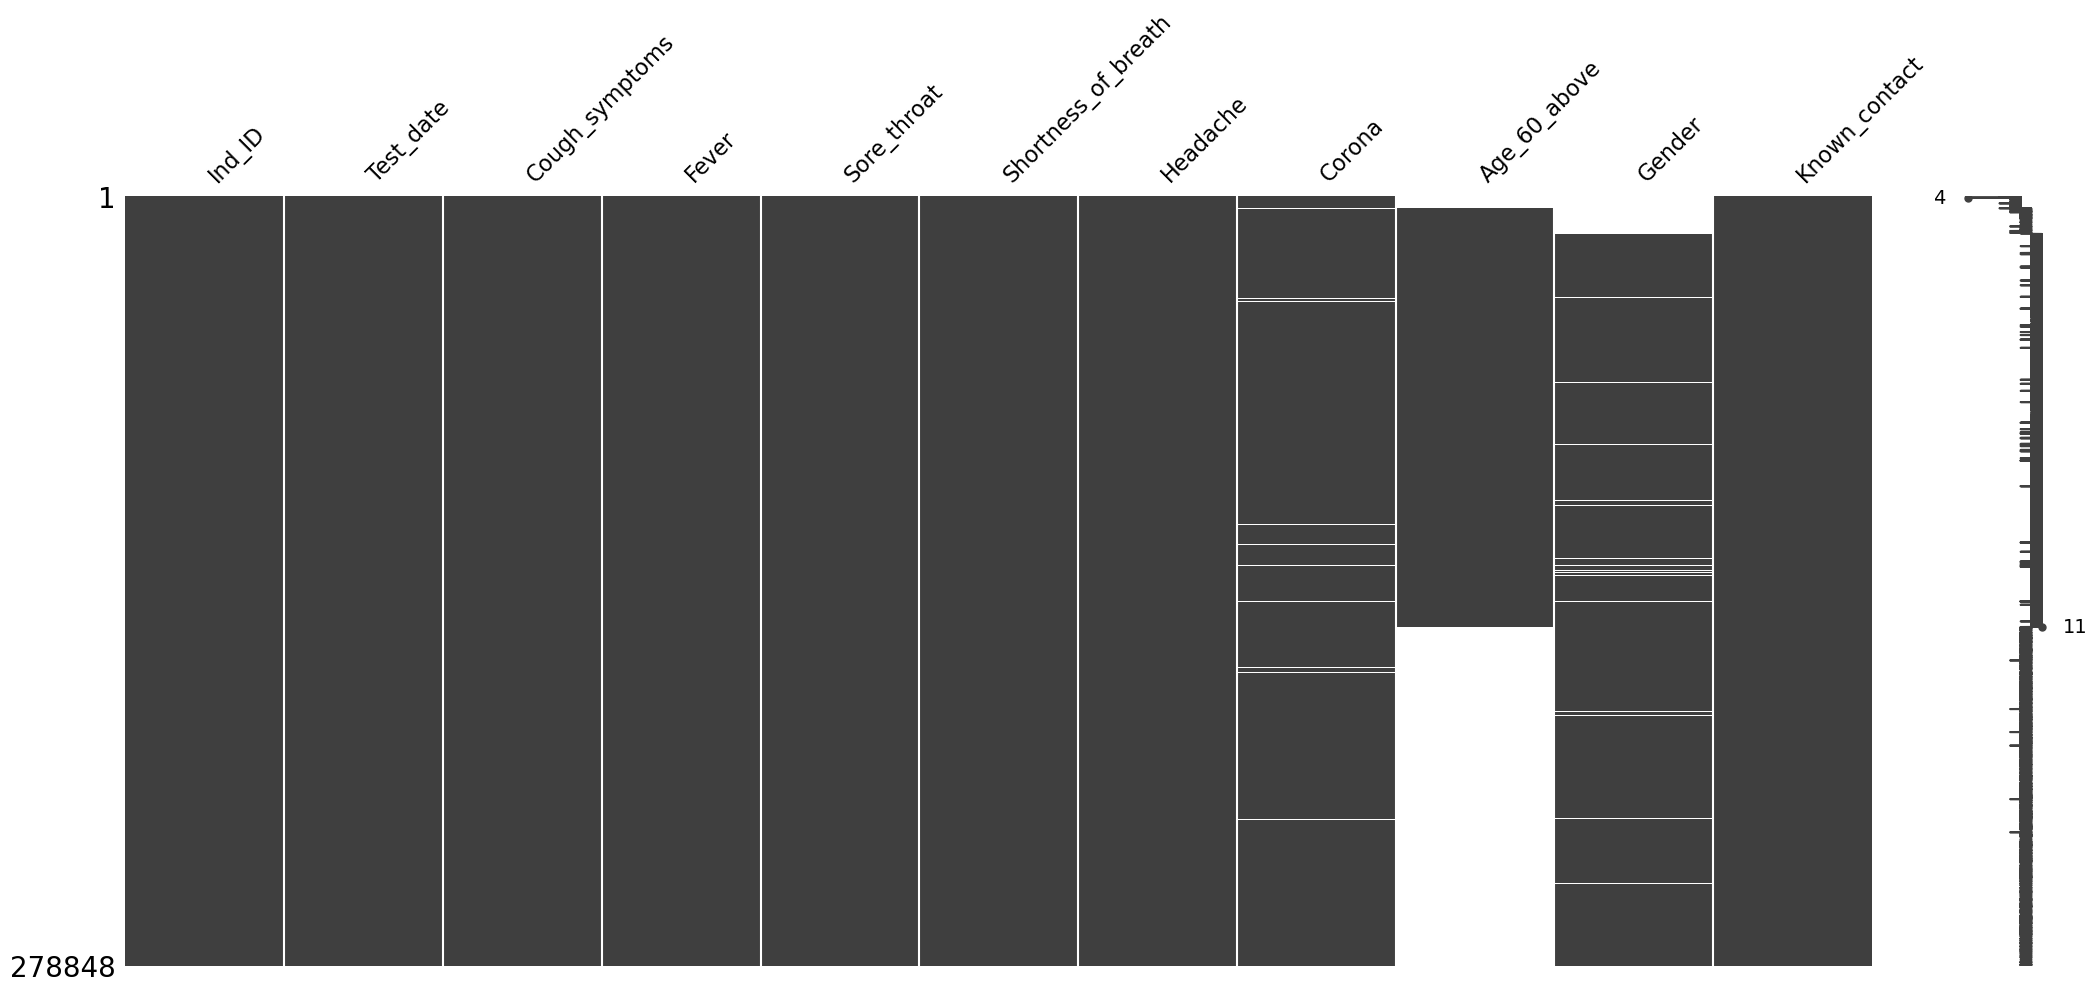

In [63]:
# Visualizing missing values using a matrix plot.
no.matrix(covid_data)
plt.show()

In [64]:
#Age_60_above: Significant chunk of missing data — potentially optional field or skipped responses.

In [65]:
features_missing = ['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Corona','Age_60_above','Gender' ]

In [66]:
# checking the percentage of missing data
for cols in features_missing:
    print(f"{cols} :\033[1m {round(covid_data[cols].isnull().sum()*100/covid_data.shape[0],4)}% \033[0m")

Cough_symptoms : 0.0904% 
Fever : 0.0904% 
Sore_throat : 0.0004% 
Shortness_of_breath : 0.0004% 
Headache : 0.0004% 
Corona : 1.3957% 
Age_60_above : 45.6593% 
Gender : 7.0157% 


In [67]:
#Remove rows with missing values in critical features (symptoms and target column Corona) 
# Excluded 'Age_60_above' from missing value removal as we plan to drop the column entirely 
    #— it is not required for the analysis since it does not significantly impact the target variable.
# Did not drop records with missing 'Gender' values as we plan to impute them later — helps retain more data for analysis.

covid_data.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Corona'],inplace = True)

In [68]:
covid_data.isnull().sum()#check to see if the missing values are eliminated.

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           125659
Gender                  19034
Known_contact               0
dtype: int64

### Univariate Analysis

In [69]:
# for date data date and month are extracted for futher analysis
covid_data['test_month']=covid_data['Test_date'].dt.month_name()
covid_data['test_day']=covid_data['Test_date'].dt.day_name()

In [70]:
covid_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Gender,Known_contact,test_month,test_day
0,1,2020-03-11,True,False,True,False,False,negative,NaN,NaN,Abroad,March,Wednesday
1,2,2020-03-11,False,True,False,False,False,positive,NaN,NaN,Abroad,March,Wednesday
2,3,2020-03-11,False,True,False,False,False,positive,NaN,NaN,Abroad,March,Wednesday
3,4,2020-03-11,True,False,False,False,False,negative,NaN,NaN,Abroad,March,Wednesday
4,5,2020-03-11,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed,March,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,2020-04-30,False,False,False,False,False,positive,NaN,male,Other,April,Thursday
278844,278845,2020-04-30,False,False,False,False,False,negative,NaN,female,Other,April,Thursday
278845,278846,2020-04-30,False,False,False,False,False,negative,NaN,male,Other,April,Thursday
278846,278847,2020-04-30,False,False,False,False,False,negative,NaN,male,Other,April,Thursday


#### Visualize the distribution of categorical features using count plots in a subplot grid

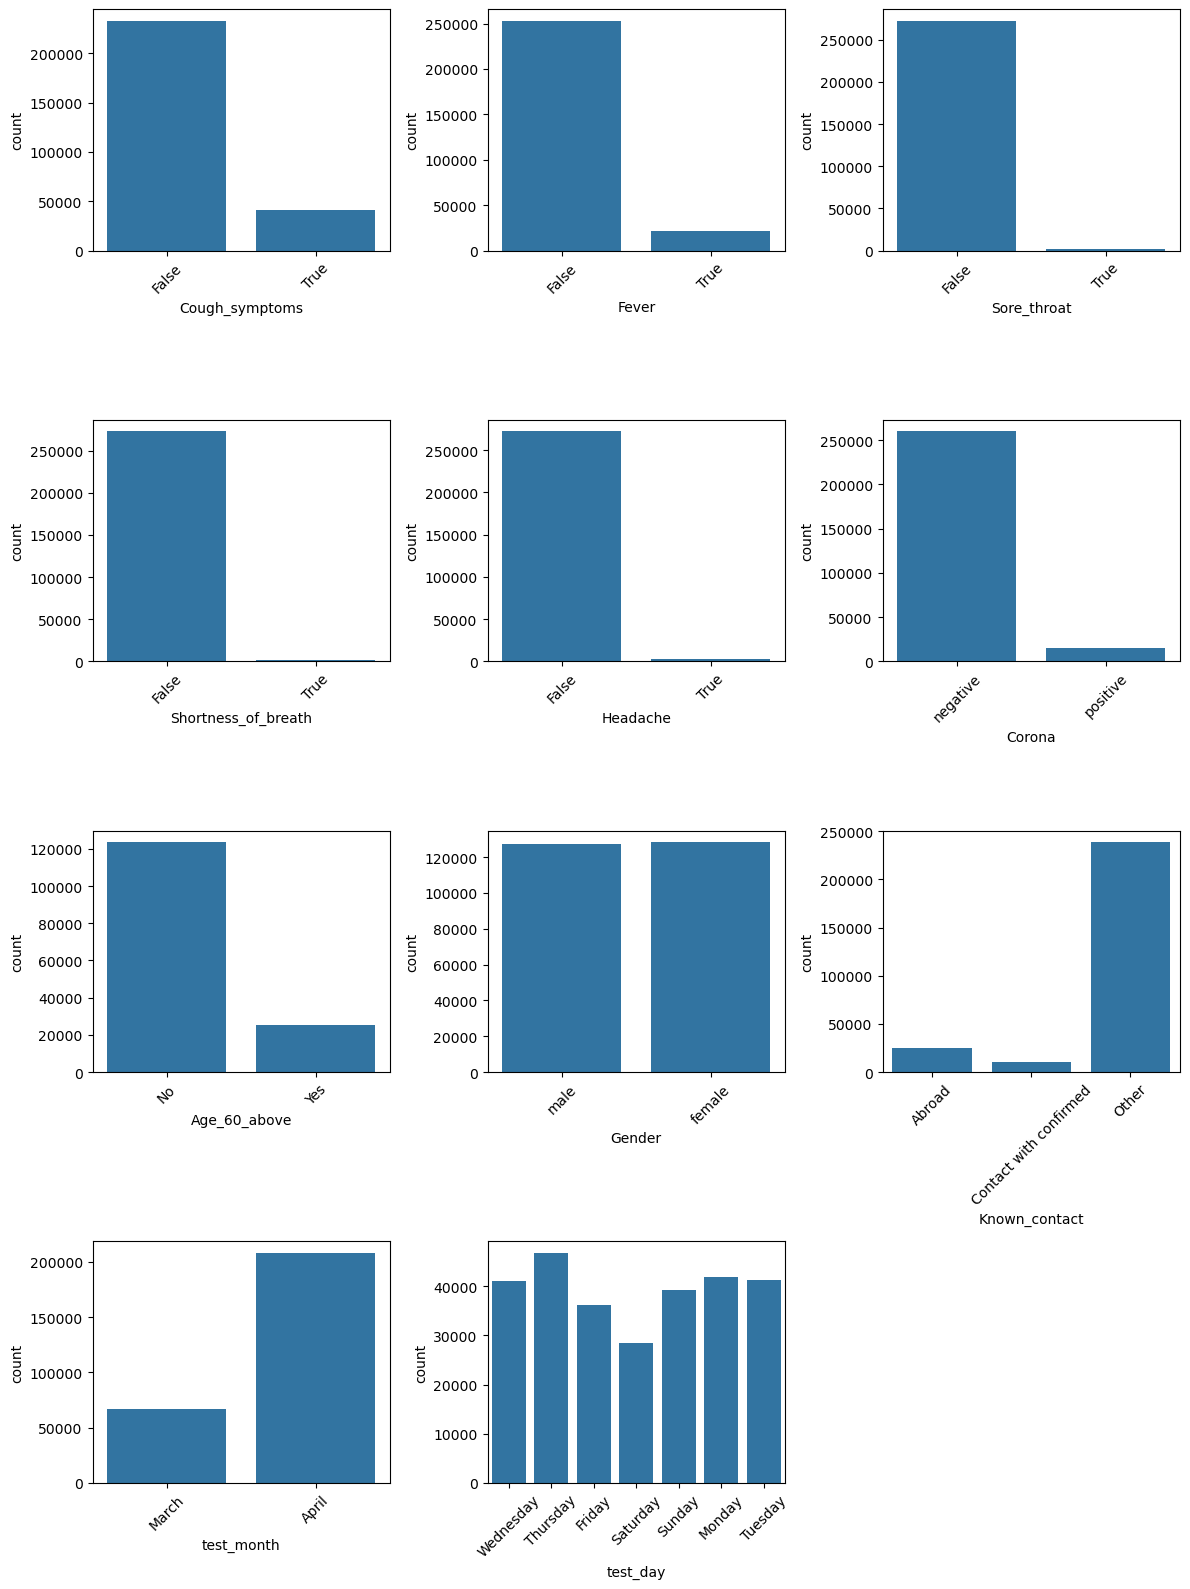

In [71]:
# Set figure size for the entire plot grid
plt.figure(figsize=(12,16))
# List of categorical columns to visualize
categorical_cols = ['Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Gender',
       'Known_contact', 'test_month', 'test_day']
# Loop through each column and its index to plot count plots
for cols,index in zip(categorical_cols,range(1,len(categorical_cols)+1)):
    plt.subplot(4,3,index)
    sns.countplot(x=covid_data[cols])
    plt.xticks(rotation= 45)
    plt.tight_layout()
# Display all plots
plt.show()

### Summary of Categorical Feature Distributions
##### 1. Symptoms ( Cough_symptoms, Fever, Sore_throat, Shortness_of_breath, Headache )
_Most symptom features are dominated by **"No"** responses.
Suggests that a large portion of individuals were **asymptomatic** at the time of testing._
##### 2. Corona
_Shows a **class imbalance** with significantly more **negative** cases than **positive**._
##### 3. Gender
_Roughly balanced between **Male** and **Female**_
##### 4. test_month and test_day
_Peaks may correspond to **COVID waves**_

#### Bivariate Analysis

In [72]:
#Compare features with target variable (Corona):
covid_data.groupby('Fever')['Corona'].value_counts(normalize = True).unstack()

Corona,negative,positive
Fever,,
False,0.963936,0.036064
True,0.739964,0.260036


In [73]:
# Examining the relationship between each categorical feature and the COVID result (Corona)
# This helps identify patterns such as which categories are more associated with positive cases
for cols in categorical_cols:
    proportion = pd.crosstab(covid_data[cols], covid_data["Corona"], normalize='index')
    print(f"Distribution for {cols}:\n", proportion)
    print("\n\n")

Distribution for Cough_symptoms:
 Corona          negative  positive
Cough_symptoms                    
False           0.965204  0.034796
True            0.841661  0.158339



Distribution for Fever:
 Corona  negative  positive
Fever                     
False   0.963936  0.036064
True    0.739964  0.260036



Distribution for Sore_throat:
 Corona       negative  positive
Sore_throat                    
False        0.951722  0.048278
True         0.193326  0.806674



Distribution for Shortness_of_breath:
 Corona               negative  positive
Shortness_of_breath                    
False                0.950461  0.049539
True                 0.248383  0.751617



Distribution for Headache:
 Corona    negative  positive
Headache                    
False     0.954231  0.045769
True      0.061843  0.938157



Distribution for Corona:
 Corona    negative  positive
Corona                      
negative       1.0       0.0
positive       0.0       1.0



Distribution for Age_60_above:


 Interpretation
1. Cough_symptoms:People with cough are more likely to test positive.
2. Fever:Fever is a strong indicator of COVID positivity.
3. Sore_throat: Sore throat is highly correlated with testing positive.
4. Shortness_of_breath: Breathing difficulty is a very strong predictor of positivity.
5. Headache:Headache seems extremely associated with positive cases.
6. Gender:Slightly higher positivity in males.
7. Known_contact: Direct contact with a confirmed case is the strongest predictor of testing positive.

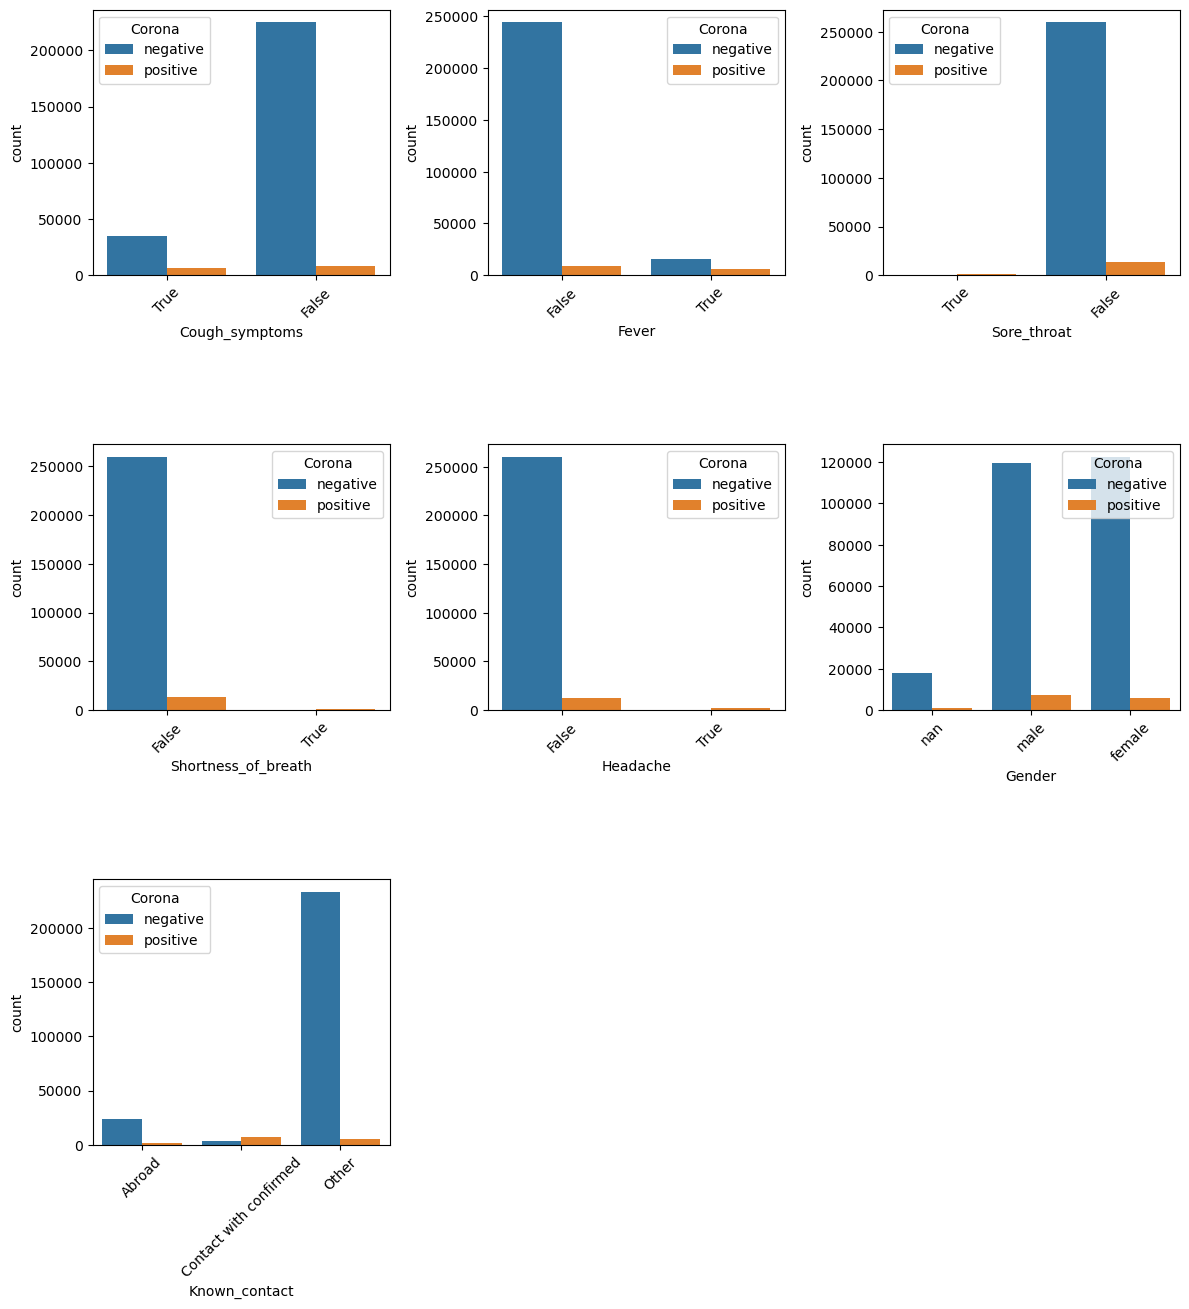

In [76]:
# Visualizing Bivariate Relationships Between Categorical Features and COVID Test Result
plt.figure(figsize=(12,16))
for cols,index in zip(categorical_cols,range(1,len(categorical_cols)+1)):
    plt.subplot(4,3,index)
    sns.countplot(x=covid_data[cols],hue=covid_data["Corona"])
    plt.xticks(rotation = 45)
    plt.tight_layout()
plt.show()

#### Summary of Feature vs Target (Corona) Inference:
- Strong association with positive cases:Fever, Cough_symptoms, and Shortness_of_breath
     these symptoms have a noticeably higher rate of COVID positivity. These are strong predictive features.
- Moderate or weak association:Sore_throat, Headache
        these symptoms occur across both positive and negative cases fairly evenly — less useful for distinguishing COVID status.
- Demographic risk indicator:Age_60_above
      Elderly individuals show a higher proportion of positive cases, indicating age is a key risk factor.
- Slight gender difference: Gender
        Small variation in positivity rate between males and femalest.
- Strong contact-based association:Known_contact
          individuals with known contact are much more likely to test positive.
- Temporal trends: test_month, test_day
         Shows how positivity rates change over time — helpful for identifying waves or clusters.



In [28]:
# Analyze symptom frequency among COVID-positive cases only
symptoms= ['Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache']
positive_cases = covid_data[covid_data['Corona']=='positive']
count = positive_cases[symptoms].apply(lambda cols :cols==True).sum()
count.sort_values(ascending=False)
#symptom_df = positive_cases[symptoms].replace({'positive': 1, 'negative': 0})

Cough_symptoms         6582
Fever                  5558
Headache               2230
Sore_throat            1523
Shortness_of_breath    1162
dtype: int64

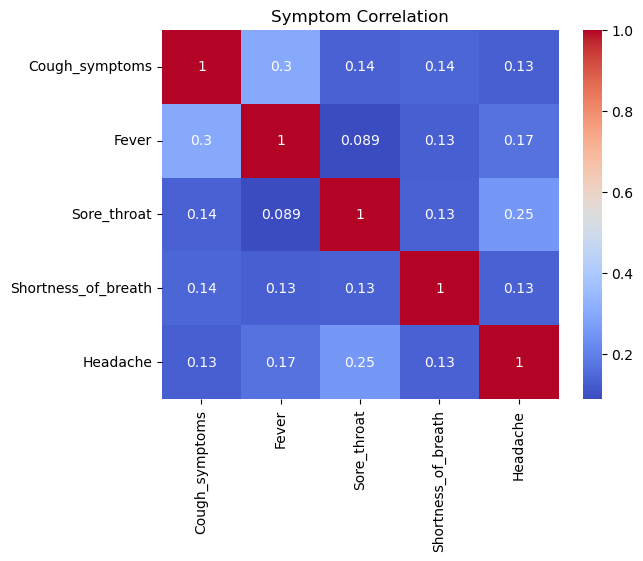

In [29]:
#Correlation Analysis Between Symptoms Among COVID-Positive Cases
#Encode symptom columns: convert 'positive' to 1 and 'negative' to 0 (binary label encoding)
# This encoding is necessary to perform numerical correlation analysis between symptoms
# Compute correlation matrix to see which symptoms tend to occur together among COVID-positive cases
symptom_df = positive_cases[symptoms].replace({'positive': 1, 'negative': 0})
sns.heatmap(symptom_df.corr(), annot=True, cmap='coolwarm')
plt.title('Symptom Correlation')
plt.show()

In [30]:
# The heatmap shows weak to moderate positive correlations among symptoms in COVID-positive cases.
# - Cough and Fever have the highest correlation (0.30), indicating they frequently occur together.
# - Headache shows mild correlation with Sore_throat (0.25) and Fever (0.17).
# - Overall, no symptoms are strongly correlated (all values < 0.5), suggesting they can appear independently in many cases.
# This analysis helps understand symptom co-occurrence patterns and supports symptom-based feature grouping or modeling.


#### Conditional Filtering 

In [31]:
#number of covid infected having no symptoms
int(covid_data["Corona"][(covid_data['Cough_symptoms']==False)&
(covid_data['Fever']==False)&
(covid_data['Headache']==False)&
(covid_data['Shortness_of_breath']==False)&
(covid_data['Sore_throat']==False)&
(covid_data['Corona']=='positive')].count())


5286

 5286 out of 14694 people have no symptoms having covid it  35% approx have nosymptoms
''5286 out of 14694 individuals tested positive for COVID-19 but showed no symptoms at all:
No cough
No fever
No headache
No sore throat
No shortness of breath'''

In [32]:
#number of covid negative tests showing symptoms
covid_data[(covid_data["Cough_symptoms"]==True) & 
           (covid_data["Fever"] == True) &
           (covid_data["Headache"] == True) & 
           (covid_data["Sore_throat"] == True)&
           (covid_data["Shortness_of_breath"] == True)&
           (covid_data["Corona"] == "negative")]

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Gender,Known_contact,test_month,test_day
37903,37904,2020-03-27,True,True,True,True,True,negative,No,female,Contact with confirmed,March,Friday
52883,52884,2020-03-29,True,True,True,True,True,negative,No,male,Other,March,Sunday
76124,76125,2020-04-01,True,True,True,True,True,negative,No,female,Contact with confirmed,April,Wednesday
205085,205086,2020-04-20,True,True,True,True,True,negative,NaN,male,Other,April,Monday


In [33]:
# Found cases where all major COVID-like symptoms are present, but the test result is negative.
# These may indicate false negatives or presence of other respiratory illnesses.

In [34]:
covid_data.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           125659
Gender                  19034
Known_contact               0
test_month                  0
test_day                    0
dtype: int64

In [35]:
#dropping Age_60_above,since there are maximum (45%) of missing values and it does not have any relation with the target variable 'Corona'
covid_drop = covid_data.drop("Age_60_above",axis=1)

In [ ]:
#Leaving the Gender column for imputation using mean/median imputation as this is an important feature that cant be dropped 


## EDA Insights

- **Fever** and **Cough** are most indicative of COVID positivity.
- **Contact history** is strongly associated with a positive COVID result.
- **Age 60+ group** shows higher COVID positivity rates compared to younger groups.
- **Gender differences** are minor and less significant in prediction.
- **Shortness of breath and sore throat** also show positive correlation with COVID cases.



## Conclusion

The exploratory analysis highlights key symptom patterns (**fever, cough, shortness of breath**) and **contact history** as important factors in COVID outcomes.

These insights show how **EDA alone can uncover valuable relationships** in the data, which can guide
further predictive modeling and decision-making.

This notebook is focused only on **Exploratory Data Analysis (EDA)**, without moving into feature engineering
or machine learning modeling.
